In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import numpy as np
from matplotlib import cm

In [3]:
df = pd.read_excel('compounds_data.xlsx')
df

,RackettZra,class,CAS_Number,UNIFACStructure,IDNumber,Formula,CriticalTemperature,CriticalPressure,CriticalVolume,Acentricity,...,AntoineCoeffsA,AntoineCoeffsB,AntoineCoeffsC,AntoineCoeffsD,AntoineCoeffsE,AntoineCoeffsF,AntoineCoeffsG,AntoineCoeffsH,name,C
0,0.28927,P,74-82-8,CH4,1.0,CH4,-82.450995,4640.680176,0.099000,0.011498,...,31.3500,-1307.52,0.0,-3.26134,2.941800e-05,2.0,0.0,0.0,Methane,1.0
1,0.28085,P,74-84-0,(CH3)2,2.0,C2H6,32.278009,4883.850098,0.148000,0.098600,...,44.0103,-2568.82,0.0,-4.97635,1.464470e-05,2.0,0.0,0.0,Ethane,2.0
2,0.27657,P,74-98-6,(CH3)2 CH2,3.0,C3H8,96.748010,4256.660156,0.200000,0.152400,...,52.3785,-3490.55,0.0,-6.10875,1.118690e-05,2.0,0.0,0.0,Propane,3.0
3,0.27493,P,75-28-5,(CH3)3 CH,4.0,C4H10,134.946008,3647.620117,0.263000,0.184790,...,58.7845,-4136.68,0.0,-7.01666,1.036620e-05,2.0,0.0,0.0,i-Butane,4.0
4,0.27292,P,106-97-8,(CH3)2 (CH2)2,5.0,C4H10,152.049005,3796.620117,0.254990,0.201000,...,66.9450,-4604.09,0.0,-8.25491,1.157060e-05,2.0,0.0,0.0,n-Butane,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,0.25762,Ni,111-68-2,(CH2)5 CH3 CH2NH2,3348.0,C7H17N,333.850000,2850.000000,0.470999,0.511255,...,126.8310,-10314.00,0.0,-16.54000,1.115880e-05,2.0,0.0,0.0,nC7Amine,7.0
1804,0.25486,Ni,578-54-1,CH3 (ACH)4 ACCH2 ACNH2,3356.0,C8H11N,430.850000,3740.000000,0.398999,0.463124,...,67.8692,-9204.70,0.0,-7.15719,2.958660e-18,6.0,0.0,0.0,oEAniline,8.0
1805,0.25581,Ni,108-75-8,(CH3)3 C5H3N,3357.0,C8H11N,379.850000,3330.000000,0.416999,0.375853,...,86.3932,-8241.40,0.0,-10.99400,8.567900e-03,1.0,0.0,0.0,246MPyridine,8.0
1806,0.25545,Ni,111-86-4,(CH2)6 CH3 CH2NH2,3374.0,C8H19N,353.850000,2580.000000,0.523998,0.567955,...,68.3292,-8450.29,0.0,-7.37849,8.688360e-18,6.0,0.0,0.0,nOctylAmine,8.0


In [4]:
new_df = df[df['class'].isin(['P', 'N', 'A'])]
new_df[['C', 'class', 'MolecularWeight', 'StdLiquidDensity',
        'NormalBoilingPoint']].groupby(['C', 'class']).mean().head(20)

MolecularWeight  StdLiquidDensity  NormalBoilingPoint
C   class                                                       
1.0 P            16.042900        299.394012         -161.525000
2.0 P            30.069901        355.683014          -88.599997
3.0 N            42.080300        507.402801          -32.778388
    P            44.097000        506.678009          -42.101996
4.0 N            56.109233        662.207461            8.583300
    P            58.124001        572.594513           -6.115988
5.0 N            69.795834        661.754191           37.627448
    P            72.151001        616.254679           24.478347
6.0 A            78.110001        882.190002           80.089014
    N            82.592868        791.611093           77.639489
    P            86.177902        660.917615           59.993811
7.0 A            92.140800        870.044006          110.649011
    N            97.833572        768.834447           97.680627
    P           100.205002        688.922791           87.799341
8.0 A           105.157000        887.817017          141.417678
    N           111.942500        781.669107           95.910870
    P           114.232002        713.615736          113.716896
9.0 A           118.884301        898.054263          169.092960
    N           125.822647        801.822050          140.673082
    P           128.259003        731.970183          137.312953

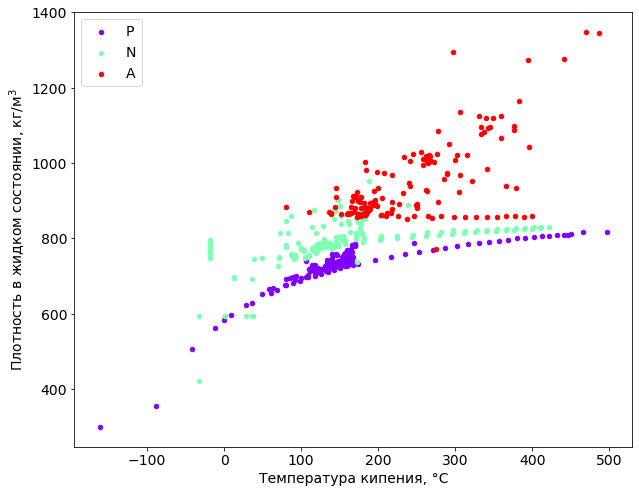

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
classes = list(new_df['class'].unique())
n_colors = len(classes)
colours = cm.rainbow(np.linspace(0, 1, n_colors))
for n, cl in enumerate(classes):
    c=colours[n].reshape(1,-1)
    
    new_df[new_df['class'] == cl].plot(x='NormalBoilingPoint',
           y='StdLiquidDensity', kind='scatter',
           ax=ax, label=cl, color=c, fontsize=14)
plt.legend(fontsize=14)
ax.set_ylabel('Плотность в жидком состоянии, кг/м$^3$', fontsize=14)
ax.set_xlabel('Температура кипения, °С', fontsize=14);

In [15]:
df[df['class']=='N'][['NormalBoilingPoint', 'StdLiquidDensity', 'name']].sort_values(by=['NormalBoilingPoint']).head(10)

,NormalBoilingPoint,StdLiquidDensity,name
170,-32.778998,420.540009,Cyclopropane
1571,-32.777778,594.265594,CYCLOPROPANE
1590,-17.777778,785.010060,trans-1-HETHYL-2-ETHYL-
1595,-17.777778,747.987928,1.c—2.c—3—TRIMETHYL-
1596,-17.777778,779.074447,1 .c—2. t—3—TRIMETHYL—
1597,-17.777778,770.321932,1 .t-2.C-3—TRIHETHYL-
1589,-17.777778,780.684105,cis-1-METHYL—2-ETHYL-
1599,-17.777778,753.319920,1.C-2.C-4- TRIMETHYL-
1600,-17.777778,771.327968,1.c—2.t—4—TRIHETHYL—
1601,-17.777778,763.279678,1.t—2.c-4—TRIHETHYL—
